# Quadratic forms

In this section, we investigate special functions called _quadratic forms_. These are functions of the form


$$
f(\boldsymbol{x}) = \boldsymbol{x^\top Ax}
$$


where $\boldsymbol{x}\in \mathbb{R}^n$ and $\boldsymbol{A}$ is an $n\times n$ matrix. To see why such functions are called quadratic forms, let's look at the case when $n=1$. In this case, $\boldsymbol{A} = a$ and $x$ are both scalars, and so


$$
f(x) = ax^2
$$


which is of course a usual quadratic. Importantly, depending on whether or not $a>0$ or $a<0$, this quadratic can be "pointing up" or "pointing down". For example, when $a=1$ we get

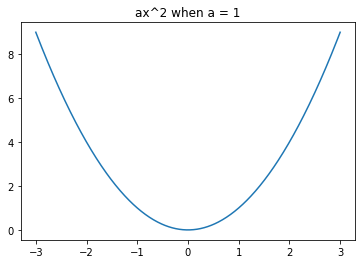

In [1]:
import numpy as np
import matplotlib.pyplot as plt

xx = np.arange(-3,3.01,.01)

a = 1
plt.plot(xx, a*xx**2)
plt.title('ax^2 when a = %s' % a)
plt.show()

while when $a=-1$ we get

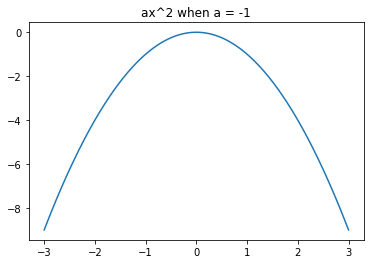

In [2]:
a = -1
plt.plot(xx, a*xx**2)
plt.title('ax^2 when a = %s' % a)
plt.show()

For $n>1$, we have the following expression for a quadratic form.


$$
f(\boldsymbol{x}) = \boldsymbol{x^\top A x} = \sum_{i,j=1}^n a_{ij}x_ix_j
$$


where $a_{ij}$ is the $(i,j)^{th}$ entry of $\boldsymbol{A}$.

Let's look at a few special cases. For example, when the matrix $\boldsymbol{A}$ is diagonal, then $a_{ij} = 0$ when $i\neq j$, and so we get


$$
f(\boldsymbol{x}) = \boldsymbol{x^\top A x} = \sum_{i=1}^n a_{ii}x_i^2
$$


which looks more like the 1-d quadratic we saw before.

## Visualizing quadratic forms

To get a better intuition for how quadratic forms work, let's focus on the $n=2$ case. In this case, our matrix $\boldsymbol{A}$ is of the form


$$
\boldsymbol{A} = \begin{pmatrix}a_{11} & a_{12}\\ a_{21} & a_{22}\end{pmatrix}
$$


and the associated quadratic form is the function


$$
f(\boldsymbol{x}) = \boldsymbol{x^\top A x} = \begin{pmatrix} x_1 & x_2\end{pmatrix}\begin{pmatrix}a_{11} & a_{12}\\ a_{21} & a_{22}\end{pmatrix}\begin{pmatrix}x_1\\ x_2\end{pmatrix} = a_{11}x_1^2 + a_{12}x_1x_2 + a_{21}x_2x_1 + a_{22}x_2^2
$$


Visualizing these functions is possible in $\mathbb{R}^2$ via a 3-d plot. Let's look at a simple example with


$$
\boldsymbol{A}_1= \begin{pmatrix}2 & 0 \\ 0&1\end{pmatrix}
$$

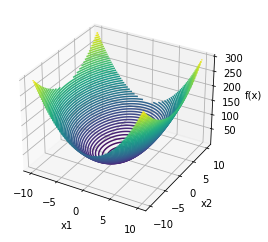

In [3]:
def f(x1, x2, A):
    return A[0,0]*x1**2 + A[0,1]*x1*x2 + A[1,0]*x2*x1 + A[1,1]*x2**2

x1 = np.linspace(-10, 10, 100)
x2 = np.linspace(-10, 10, 100)

X1, X2 = np.meshgrid(x1, x2)

A1 = np.array([[2,0],[0,1]])
X3 = f(X1,X2, A1)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X1, X2, X3, 50)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(x)')
plt.show()

Here we see that the quadratic form is a bowl shape, pointing upward. Let's see when happens when we make the entries of the matrix $\boldsymbol{A}$ negative, i.e. using the matrix


$$
\boldsymbol{A}_2= \begin{pmatrix}-2 & 0 \\ 0&-1\end{pmatrix}
$$

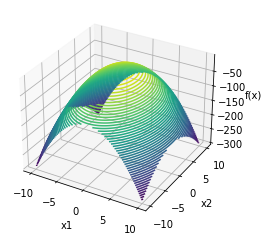

In [4]:
A2 = np.array([[-2,0],[0,-1]])
X3 = f(X1,X2,A2)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X1, X2, X3, 50)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(x)')
plt.show()

In this case, we get a downward shaped-bowl. These two cases are analogous to the simple 1-d examples, where $a>0$ or $a<0$. However, in 2d we also have a third case: where one of the entries is positive, and the other is negative. For example, let's consider the matrix


$$
\boldsymbol{A}_3 = \begin{pmatrix}2&0\\ 0&-1\end{pmatrix}
$$

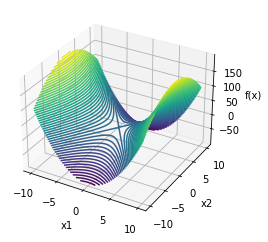

In [5]:
A3 = np.array([[2,0],[0,-1]])
X3 = f(X1,X2,A3)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X1, X2, X3, 50)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(x)')
plt.show()

In this case, we get neither a bowl up nor a bowl down shape, but rather a hyperbolic surface.

The last example we will see is a when one of diagonals is equal to zero. For example, the matrix


$$
\boldsymbol{A}_4 = \begin{pmatrix}2 & 0\\ 0 &0\end{pmatrix}
$$


Notice that the function $f(\boldsymbol{x}) = \boldsymbol{x^\top A}_4 \boldsymbol{x} = 2x_1^2$ and hence does not depend on the second coordinate of $\boldsymbol{x}$ at all. Thus we should see that the plot of $f(\boldsymbol{x})$ is 'flat' along the $x_2$ axis. Let's check this.

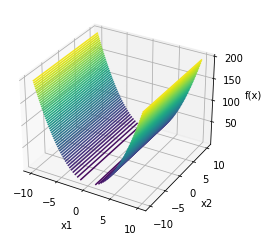

In [6]:
A4 = np.array([[2,0],[0,0]])
X3 = f(X1,X2,A4)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X1, X2, X3, 50)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(x)')
plt.show()

Indeed, we get a parabola-like shape as we vary $x_1$, but the plot of $f$ is constant as we vary $x_2$ while keeping $x_1$ fixed.

Another way to visualize quadratic forms is with looking at the _level curves_ of the function $f(\boldsymbol{x}) = \boldsymbol{x^\top A x}$. The _$\lambda$-level curve_ (or _level set_) of a function $f(\boldsymbol{x})$ is the set $\Omega_\lambda = \{x : f(\boldsymbol{x}) = \lambda\}$. Level curves are also sometimes called contour plots. Let's see a few examples of them in python.

For example, let's look at $f(\boldsymbol{x})=\boldsymbol{x^\top A}_1 \boldsymbol{x}$. We can visualize the level curves of this function as follows.

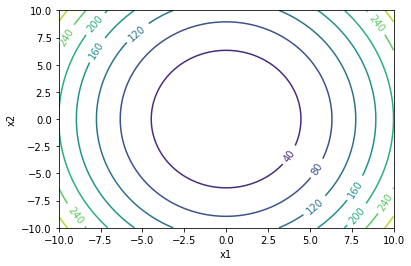

In [7]:
x1 = np.linspace(-10, 10, 100)
x2 = np.linspace(-10, 10, 100)

A1 = np.array([[2,0],[0,1]])

X1, X2 = np.meshgrid(x1, x2)
X3 = f(X1,X2, A1)

contours = plt.contour(X1, X2, X3)
plt.clabel(contours, inline=1, fontsize=10)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

Here the level curves of $f(\boldsymbol{x})$ form ellipses. We see that the values of the function are smallest near the origin, and grow larger as we move farther away from it.

Let's see an example with the indefinite matrix $\boldsymbol{A}_3$.

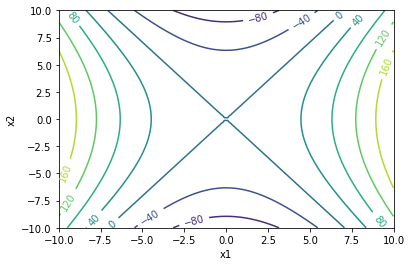

In [8]:
A3 = np.array([[2,0],[0,-1]])
X3 = f(X1,X2, A3)

contours = plt.contour(X1, X2, X3)
plt.clabel(contours, inline=1, fontsize=10)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

For this matrix, the level curves of the quadratic form $\boldsymbol{x^\top A}_3 \boldsymbol{x}$ form hyperbolas.

## Positive definite, negative definite, and indefinite matrices

It turns out that the shapes of these surfaces can be characterized in terms of the _definiteness_ of the matrix $\boldsymbol{A}$.

Let $\boldsymbol{A}$ be an $n\times n$ matrix. Then

- The matrix $\boldsymbol{A}$ is called _positive definite_ if for any $x\neq 0$, we have that $f(\boldsymbol{x}) = \boldsymbol{x^\top A x} >0$. The matrix $\boldsymbol{A}$ is called _positive semi-definite_ if for any $\boldsymbol{x}\neq 0$, we have that $f(\boldsymbol{x}) = \boldsymbol{x^\top A x} \geq 0$.
- The matrix $\boldsymbol{A}$ is called _negative definite_ if for any $\boldsymbol{x}\neq 0$, we have that $f(\boldsymbol{x}) = \boldsymbol{x^\top A x}<0$. The matrix $\boldsymbol{A}$ is called _negative semi-definite_ if for any $\boldsymbol{x}\neq 0$, we have that $f(\boldsymbol{x}) = \boldsymbol{x^\top A x} \leq 0$.
- If the matrix $\boldsymbol{A}$ is neither positive (semi-)definite nor negative (semi-)definite, then it is called _indefinite_.

In the above section, the matrix $\boldsymbol{A}_1$ was an example of a _positive definite_ matrix, $\boldsymbol{A}_2$ was an example of a _negative definite_ matrix and $\boldsymbol{A}_3$ was an example of an _indefinite_ matrix.  The matrix $\boldsymbol{A}_4$ was an example of a (strictly) _positive semi-definite_ matrix. To see why, note that for $\boldsymbol{x}  = \begin{pmatrix}x_1\\ x_2\end{pmatrix}\neq 0$, we have


$$
\boldsymbol{x^\top A}_1 \boldsymbol{x} = 2x_1^2 + x_2^2 >0 \hspace{10mm}\text{and} \hspace{10mm} \boldsymbol{x^\top A}_2 \boldsymbol{x} = -2x_1^2 - x_2^2 <0.
$$


On the other hand, for the matrix $\boldsymbol{A}_3$ let's see what happens when we look at the vectors $\boldsymbol{e}_1 = \begin{pmatrix}1\\0\end{pmatrix}$ and $\boldsymbol{e}_2 = \begin{pmatrix}0\\1\end{pmatrix}$. Then


$$
\boldsymbol{e}_1^\top \boldsymbol{A}_3 \boldsymbol{e}_1 = 2
$$


but


$$
\boldsymbol{e}_2^\top \boldsymbol{A}_3 \boldsymbol{e}_2 = -1.
$$


Hence the function $f(\boldsymbol{x}) = \boldsymbol{x^\top A}_3 \boldsymbol{x}$ can be either positive or negative depending on the input vector $\boldsymbol{x}$.

Similarly, we have that $\boldsymbol{e}_2^\top \boldsymbol{A}_4 \boldsymbol{e}_2= 0$, and so the function $f(\boldsymbol{x}) = \boldsymbol{x^\top A}_4 \boldsymbol{x}$ cannot be positive definite.

Of course, the examples we saw here were all diagonal matrices, but we could just as easily look at matrices which aren't diagonal.

Let's look at examples of positive definite and negative definite matrices which are not diagonal. To do this, a useful trick is to note that for any matrix $\boldsymbol{A}$, the matrix $\boldsymbol{B}_1 = \boldsymbol{A^\top A}$ is always positive semi-definite, while, conversely, the matrix $\boldsymbol{B}_2 = -\boldsymbol{A^\top A}$ is always negative semi-definite. To see why this is the case, note that


$$
\boldsymbol{x^\top B}_1 \boldsymbol{x} = \boldsymbol{x^\top A^\top A x} = (\boldsymbol{Ax})^\top \boldsymbol{Ax} = \|\boldsymbol{Ax}\|_2^2 \geq 0
$$


and


$$
\boldsymbol{x^\top B}_2 \boldsymbol{x} = -\boldsymbol{x^\top A^\top A x} = -(\boldsymbol{Ax})^\top \boldsymbol{Ax} = -\|\boldsymbol{Ax}\|_2^2 \leq 0.
$$


Furthermore, the matrix $\boldsymbol{B}_1$ (resp. $\boldsymbol{B}_2$) will always be strictly positive (resp. negative) definite whenever $\boldsymbol{A}$ is has full column rank, that is, whenever $\boldsymbol{A}$ has linearly independent columns. Let's see a few examples.

To generate $\boldsymbol{B}_1$ and $\boldsymbol{B}_2$, we'll generate a random $2\times 2$ matrix and compute $\boldsymbol{B}_1 = \boldsymbol{A^\top A}$ and $\boldsymbol{B}_2 = -\boldsymbol{A^\top A}$.

In [9]:
np.random.seed(1111)
A = np.random.normal(size=(2,2))
B1 = np.dot(A.T, A)
B2 = -B1

Now we can visualize the quadratic forms $\boldsymbol{x^\top B}_1 \boldsymbol{x}$ and $\boldsymbol{x^\top B}_2 \boldsymbol{x}$.

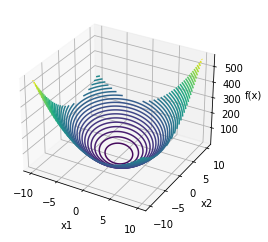

In [10]:
X3 = f(X1,X2, B1)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X1, X2, X3, 50)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(x)')
plt.show()

Indeed, since $\boldsymbol{B}_1$ is positive definite, we see that we get the familiar upward bowl shape.

Now let's look at $f(\boldsymbol{x}) = \boldsymbol{x^\top B}_2 \boldsymbol{x}$.

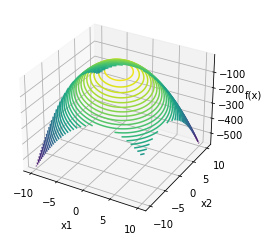

In [11]:
X3 = f(X1,X2, B2)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X1, X2, X3, 50)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(x)')
plt.show()

Again, we get the usual downward bowl shape associated with a negative definite matrix.

Next, let's see an example of a _semi-definite_ matrix -- that is, one for which $\boldsymbol{x^\top A x} = 0$ for some non-zero vector. Recall that the matrix $\boldsymbol{A}$ will be will be (positive or negative) semi-definite if the columns of $\boldsymbol{A}$ are not linearly independent. Let's use the following example:


$$
\boldsymbol{A} = \begin{pmatrix} 1 & -2 \\ -1 & 2\end{pmatrix}
$$


Since the second column is $-2$ times the first column, this matrix will not be strictly positive or negative definite. Let's see what the function $f(\boldsymbol{x}) = \boldsymbol{x^\top Ax}$ looks like for this matrix.

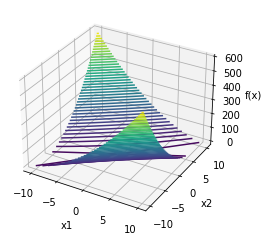

In [12]:
A = np.array([[1,-2],[-1,2]])

X3 = f(X1,X2, A)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X1, X2, X3, 50)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(x)')
plt.show()

Here we obtain an upward-pointing shape, but not quite the bowl shape that we had before. Indeed, it turns out that for any $x$ in  the subspace


$$
S = \{\boldsymbol{x} = \begin{pmatrix}x_1\\ x_2\end{pmatrix} : x_1 = x_2\}
$$


we have that $\boldsymbol{x^\top A x} = 0$. Visually, this is represented by the flat region where the function is equal to zero at the bottom of the bowl. Indeed, it turns out that for this matrix, this flat line at the bottom of the bowl is just the $x_2 = x_1$ line in the $(x_1,x_2)$ plane.

## Finding extrema of quadratic forms

For the purposes of this class, we are often interested in finding _extrema_ of quadratic forms $f(\boldsymbol{x}) = \boldsymbol{x^\top A x}$, that is maxima or minima of quadratic forms. For positive or negative definite matrices $\boldsymbol{A}$, however, if $\boldsymbol{x}$ is allowed to be an arbitrary vector, $f(\boldsymbol{x})$ can be made arbitrarily large or small, respectively. Therefore, it is convenient to restricting ourselves to unit vectors $\boldsymbol{x}$. Therefore, we consider the following optimization problem:


$$
\max_{\boldsymbol{x}}/\min_\boldsymbol{x} f(\boldsymbol{x}) = \boldsymbol{x^\top A x}\\
\text{subject to}\;\;\; \|\boldsymbol{x}\|_2^2 = \boldsymbol{x^\top x} = 1
$$


In 2-d we can easy visualize the function $f(\boldsymbol{x}) = \boldsymbol{x^\top A x}$ for unit vectors $\boldsymbol{x}$. This is because any unit vector $\boldsymbol{x}\in \mathbb{R}^2$ lies on the unit circle, and is hence of the form $\boldsymbol{x}(\theta) = \begin{pmatrix}\cos(\theta)\\ \sin(\theta)\end{pmatrix}$. Let's try plotting $f(\boldsymbol{x}(\theta))$ as a function of the $\theta$.

First, let's draw a random $2\times 2$ matrix $\boldsymbol{A}$, and construct the positive definite matrix $\boldsymbol{B} = \boldsymbol{A^\top A}$.

In [13]:
A = np.random.normal(size=(2,2))
B = np.dot(A.T,A)

Next, let's define the function $g(\theta) = f(\boldsymbol{x}(\theta)) = \boldsymbol{x}(\theta)^\top \boldsymbol{B} \boldsymbol{x}(\theta)$.

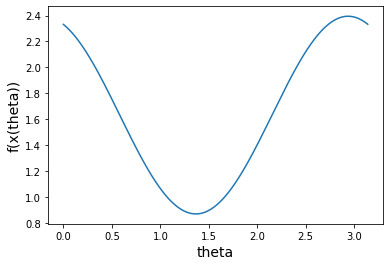

In [14]:
def g(theta, B):
    x = np.array([np.cos(theta), np.sin(theta)])
    return np.dot(x, np.dot(B,x))

theta_range = np.arange(0, np.pi, .01)
plt.plot(theta_range, [g(theta,B) for theta in theta_range])
plt.xlabel('theta', fontsize=14)
plt.ylabel('f(x(theta))', fontsize=14)
plt.show()

Notice that this function is always positive -- as expected, since $B$ is positive definite. We should observe that $\boldsymbol{x}(\theta)^\top \boldsymbol{B} \boldsymbol{x}(\theta)$ has two extrema: one maximum, and one minimum, both strictly greater than zero. The value of the function at these extrema are special: they are called the _eigenvalues_ of the matrix $\boldsymbol{B}$. If $\theta_{min}, \theta_{max}$ are the values of $\theta$ at which the minimum/maximum occurs, then the vectors $\boldsymbol{x}_{min} = \begin{pmatrix}\cos(\theta_{min})\\ \sin(\theta_{min})\end{pmatrix}$ and $\boldsymbol{x}_{max} = \begin{pmatrix}\cos(\theta_{max})\\ \sin(\theta_{max})\end{pmatrix}$ are called the _eigenvectors_ of the matrix $\boldsymbol{B}$.

We can also look at an example when $\boldsymbol{B}$ is negative definite.

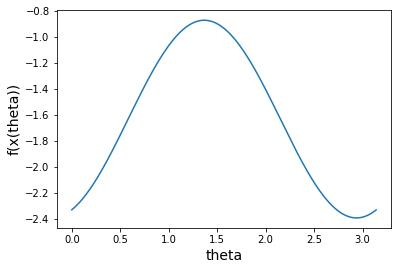

In [15]:
B = -B
theta_range = np.arange(0, np.pi, .01)
plt.plot(theta_range, [g(theta,B) for theta in theta_range])
plt.xlabel('theta', fontsize=14)
plt.ylabel('f(x(theta))', fontsize=14)
plt.show()

This time, the function is always negative, again as we would expect from a negative definite matrix $\boldsymbol{B}$. We again also have one maximum and one minimum, again corresponding to the _eigenvalues_ of the matrix $\boldsymbol{B}$.

Let's also look at an example where the matrix $\boldsymbol{B}$ is indefinite. For example, consider the matrix


$$
\boldsymbol{B} = \begin{pmatrix}1 & 2\\ -1 & -4 \end{pmatrix}
$$

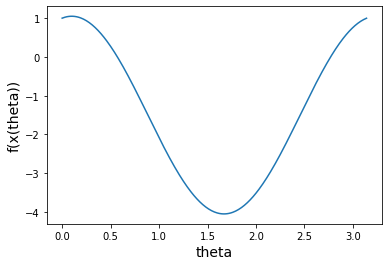

In [16]:
B = np.array([[1,2], [-1,-4]])

theta_range = np.arange(0, np.pi, .01)
plt.plot(theta_range, [g(theta,B) for theta in theta_range])
plt.xlabel('theta', fontsize=14)
plt.ylabel('f(x(theta))', fontsize=14)
plt.show()

In this case, the function $f(\boldsymbol{x}) = \boldsymbol{x^\top B x}$ is sometimes positive and sometimes negative. $f$ still has one maximum and one minimum; this time the maximum is strictly positive, while the minimum is strictly negative.

At this point, it should be intuitive the _eigenvalues_ (i.e. the extrema of the function $f(\boldsymbol{x}) = \boldsymbol{x^\top B x}$) are always non-negative for a positive semi-definite matrix, always non-positive for a negative semi-definite matrix, and both positive and negative for an indefinite matrix.

<!-- ### Bonus: Lagrange multipliers

If you're familiar with the method of Lagrange multipliers, this problem can be reframed as optimizing the following:


$$
L(x,\lambda) = x^\top A x - \lambda (x^\top x - 1)
$$


If we take the derivative of this function with respect to $x$ and set it equal to $0$, we get


$$
0 = \nabla_x L(x,\lambda) = 2Ax - 2\lambda x \implies Ax = \lambda x
$$


Thus the maxima of the constrained optimization problem (finding the maximum of $f(x)=x^\top A x$ subject to $\|x\|_2 = 1$) are the solutions of the equation $Ax = \lambda x$. Pairs $(\lambda, x)$ which satisfy this equation are important: they are called _eigenvalues_ and _eigenvectors_ of the matrix $A$.

### Another bonus: completing the square

Sometimes, we are given a function which looks a bit like a quadratic form, say a function that looks like


$$
f(x) = x^\top A x - 2b^\top x
$$


where here $b$ is some vector. Because functions quadratic forms are convenient to work with, we would like to rearrange $f$ so that it looks more like a pure quadratic form (i.e. without the linear term). It turns out that there is a version of completing the square that works even in higher dimensions. Indeed, if $A$ is an invertible matrix, then we can write


$$
f(x) = x^\top A x - 2b^\top x = (x-A^{-1}b)^\top A (x-A^{-1}b) - b^\top A^{-1} b
$$


If we use the change of variable $z= x-A^{-1}b$ and let $c = -b^\top A^{-1}b$, then we can write this as


$$
f(z) = z^\top A z + c
$$


which looks much more convenient to work with. While we won't use this trick immediately, it is frequently useful and worth remembering. -->